In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_json("drive/MyDrive/data/kyxnya/train.json")
df_test = pd.read_json("drive/MyDrive/data/kyxnya/test.json")
df_test, df_train

(         id                                        ingredients
 0     18009  [baking powder, eggs, all-purpose flour, raisi...
 1     28583  [sugar, egg yolks, corn starch, cream of tarta...
 2     41580  [sausage links, fennel bulb, fronds, olive oil...
 3     29752  [meat cuts, file powder, smoked sausage, okra,...
 4     35687  [ground black pepper, salt, sausage casings, l...
 ...     ...                                                ...
 9939  30246  [large egg yolks, fresh lemon juice, sugar, bo...
 9940  36028  [hot sauce, butter, sweet potatoes, adobo sauc...
 9941  22339  [black pepper, salt, parmigiano reggiano chees...
 9942  42525  [cheddar cheese, cayenne, paprika, plum tomato...
 9943   1443  [cold water, olive oil, lime wedges, garlic cl...
 
 [9944 rows x 2 columns],
           id      cuisine                                        ingredients
 0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
 1      25693  southern_us  [plain flour, ground

In [ ]:
df_test['ingredients'].unique

<bound method Series.unique of 0       [baking powder, eggs, all-purpose flour, raisi...
1       [sugar, egg yolks, corn starch, cream of tarta...
2       [sausage links, fennel bulb, fronds, olive oil...
3       [meat cuts, file powder, smoked sausage, okra,...
4       [ground black pepper, salt, sausage casings, l...
                              ...                        
9939    [large egg yolks, fresh lemon juice, sugar, bo...
9940    [hot sauce, butter, sweet potatoes, adobo sauc...
9941    [black pepper, salt, parmigiano reggiano chees...
9942    [cheddar cheese, cayenne, paprika, plum tomato...
9943    [cold water, olive oil, lime wedges, garlic cl...
Name: ingredients, Length: 9944, dtype: object>

In [ ]:
df_train.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [ ]:
import missingno

In [ ]:
# # матричная диаграмма пропусков
# missingno.matrix(df, figsize=(10,10), fontsize=12)

<Axes: >

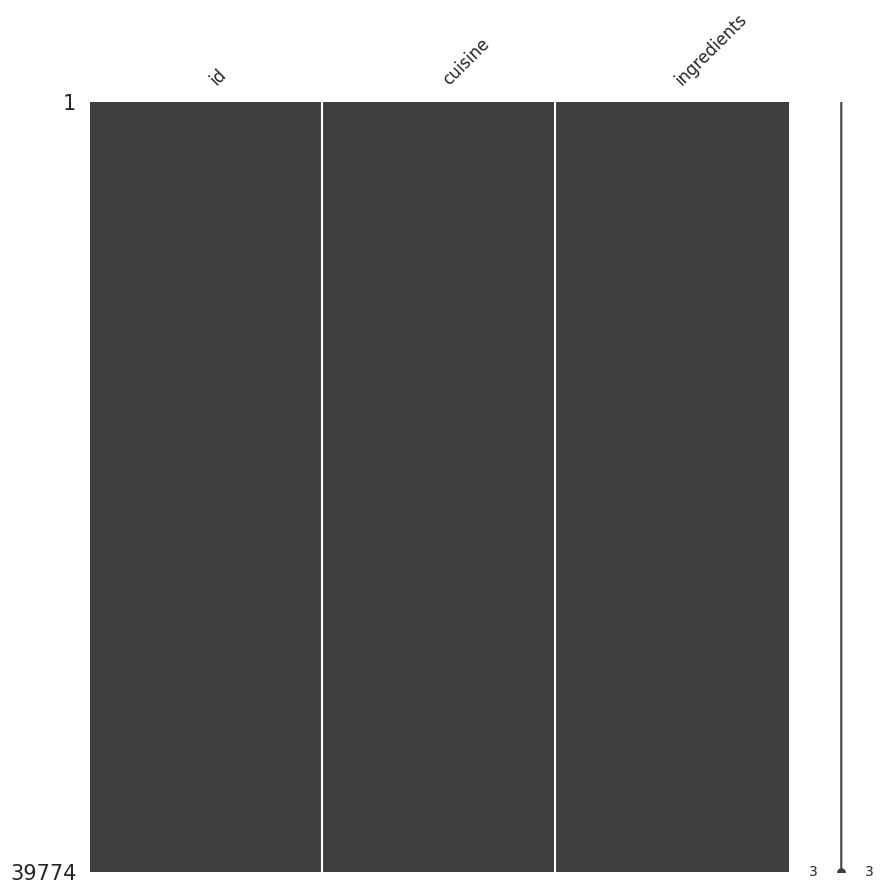

In [ ]:
# # матричная диаграмма пропусков
missingno.matrix(df_train, figsize=(10,10), fontsize=12)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x = df_train['cuisine'].value_counts().index
y = df_train['cuisine'].value_counts().values

In [ ]:
all_ingredients = [] # list to store all ingredients
for indiv_ingredient_list in df_train['ingredients'].values:
    for ingredient in indiv_ingredient_list:
        all_ingredients.append(ingredient)

In [ ]:
ingredient = pd.DataFrame(all_ingredients)

In [ ]:
x = ingredient.value_counts()[0:30].index.tolist()
y = ingredient.value_counts()[0:30].values

df = pd.DataFrame({
    'Ingredient':x,
    'These many entries':y
})
# fig = sns.countplot(df_train['cuisine'])
fig = px.pie(df,
             names='Ingredient',
             values='These many entries',
             color='Ingredient')
fig.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
X = df_train.drop(columns=['cuisine', 'id'])

y = df_train['cuisine']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
y_train = enc.fit(y_train).transform(y_train)
y_test  = enc.fit(y_test).transform(y_test)


In [ ]:
from sklearn.cluster import KMeans
clust = KMeans(n_clusters=2, n_init="auto")
clust.fit(X)
y_pred = clust.predict(X)
y_pred

array([ 7, 13,  7, ...,  9, 15,  3])

In [ ]:
# X_train['ingredients'] = X_train['ingredients'].apply(lambda x: str(np.sort(np.array(x))))
# X_test['ingredients'] = X_test['ingredients'].apply(lambda x:  ' '.join(sorted(x)))


In [ ]:
import re
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from functools import reduce

In [ ]:
# X_train['ingredients'] = X_train['ingredients'].apply(lambda x: sorted(x))
X_train['ingredients'] = X_train['ingredients'].apply(lambda x: str((np.array(x))))
X_test['ingredients'] = X_test['ingredients'].apply(lambda x:  ' '.join(sorted(x)))

X_train['ingredients']

31255    ['yellow onion' 'hot water' 'ground turmeric' ...
32399    ['lime juice' 'zucchini' 'chili powder' 'salt'...
34614    ['fresh ginger' 'cauliflower florets' 'lemon j...
22301    ['fish sauce' 'pepper' 'garlic' 'calamansi' 'b...
4688     ['water' 'salt' 'celery' 'onions' 'chicken sto...
                               ...                        
7813     ['orange juice concentrate' 'garlic cloves' 'f...
32511    ['grated parmesan cheese' 'fresh basil leaves'...
5192     ['basil leaves' 'olive oil' 'extra-virgin oliv...
12172    ['powdered sugar' 'large egg yolks' 'salt' 'he...
33003    ['soy sauce' 'black beans' 'green onions' 'gar...
Name: ingredients, Length: 31819, dtype: object

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
en_stemmer = SnowballStemmer("english")

In [ ]:
# X_train['ingredients'].apply(lambda x: [en_stemmer.stem(i) for i in x])
# X_train['ingredients'].apply(lambda x: word_tokenize(x))

In [ ]:
text = X_train['ingredients'].to_numpy()
text = reduce(lambda x, y: x + ', ' + y, text)

In [ ]:
wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

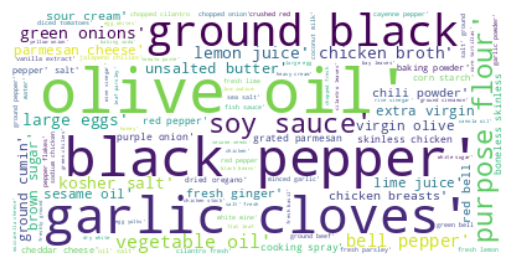

In [ ]:
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = TfidfVectorizer()
cv = TfidfVectorizer(smooth_idf=True,max_df=0.6,min_df=0.01,max_features=100000,use_idf=True, ngram_range=(1,3))
X_train_bow = cv.fit_transform(X_train['ingredients'])
# X_test_bow = cv.transform(X_test['ingredients']).toarray()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clu = KMeans(n_clusters=2).fit(X_train_bow)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
clu.fit(X_train_bow)

KMeans(n_clusters=2)

In [ ]:
clu.score(X_train_bow)

-28793.22991227227

In [ ]:
# corr = df.corr()
# corr.style.background_gradient(cmap='RdYlGn')
# corr.style.highlight_max('Protein_(g)')
# corr.style.set_table_styles()

In [ ]:
# plt.figure(figsize=(30,30))
# sns.heatmap(df.corr(), linewidths=.0, annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0))

In [ ]:
x = df_train.drop(columns=['cuisine', 'id'])
y = df_train['cuisine']
X_train, X_test, y_train, y_test= train_test_split(x,y , test_size=0.3)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: ignored

In [ ]:
clf = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(random_state=0))

In [ ]:
x = df_train.drop(columns='price_range')
y = df_train['price_range']
X_train, X_test, y_train, y_test= train_test_split(x,y , test_size=0.3)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
parametres = {'max_depth':[2,5],
              'min_samples_split':[2,5],
              'ccp_alpha' : [0.0, 0.5],
              'min_samples_leaf':[1, 3]}
clf = RandomizedSearchCV(DecisionTreeClassifier(), parametres)

In [ ]:
search = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn import tree
clf = search.best_estimator_
plt.figure(figsize=(20, 10))
tree.plot_tree(clf)
plt.show()

In [ ]:
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)
parametres = {}
clf = RandomizedSearchCV(clf, parametres)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf =  RandomForestClassifier(n_estimators=100)
parametres = {'max_depth':[2,5],
              'min_samples_split':[2,5],
              'ccp_alpha' : [0.0, 0.5],
              'min_samples_leaf':[1, 3]}
clf = RandomizedSearchCV(clf, parametres)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf =  GradientBoostingClassifier(n_estimators=100)
parametres = {'max_depth':[2,5],
              'min_samples_split':[2,5],
              'ccp_alpha' : [0.0, 0.5],
              'min_samples_leaf':[1, 3]}
clf = RandomizedSearchCV(clf, parametres)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)